In [1]:
## Importing the Required Liabries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:\Projects\Traffic_Sign_Recognition\GTRSB')   # Data set location (Dataset is not available in same path where this python file is created hence imported from this path)
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
## Data and Labels stored in List

data =[]                                    # Create empty list : data
labels = []                                 # Create empty list : labels
classes =43                                 # we have 43 classes for classification
cur_path = os.getcwd()                      # it returns working directory path(CWD-Current Working Directory) where data is saved.

In [3]:
## Image Preprocessing

for i in range(classes):                            # This loop iterates 43 times
    path = os.path.join(cur_path,'train',str(i))    # Open and iterate folders from 'train' folder
    images = os.listdir(path)  
    for a in images:
        try:             
            image = Image.open(path +'\\'+ a)       # Open image          
            image = image.resize((30,30))           # Resize image to 30*30 - best for neural network feeding                                          
            image =np.array(image)                  # Convert image into array 
            data.append(image)                      # Append this image array data into list named data
            labels.append(i)                        # Append labels to all image
        except Exception as e:
            print(e)

In [4]:
## Conversion of Lists into numpy arrays            

data = np.array(data)                               # Convert data list into array
labels = np.array(labels)                           # Convert labels list into array
print(data.shape, labels.shape)                     # Display shape ofimage  data and labels arrays.
                                                    # Both needs to be same

(39209, 30, 30, 3) (39209,)


In [5]:
## Create Directory training in provided path
#os.mkdir('training')                               #--This can be created only once so comment it whenever you rerun.

                                                    # Save Data to Data and Target folders for future use.

np.save('./training/data',data)                     # Save image data 
np.save('./training/target',labels)                 # Save image labels

In [6]:
## load data and labels to training folder

data=np.load('./training/data.npy')                # Load saved image data 
labels=np.load('./training/target.npy')            # Load saved labels data

In [7]:
## Check size of data and labels.
print(data.shape, labels.shape)                   # Display size of data and labels

(39209, 30, 30, 3) (39209,)


In [8]:
## Split the dataset for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,random_state=0) # Training and testing splitting (here 80/20 ratio) - from 'sklearn'

In [9]:
## Check the size of Training and Testing.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)      # X train and y train shape should be same, x test and y test shape should be same.

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
## Convert Labels to One-Hot Encoding
y_train = to_categorical(y_train,43)  # One hot encoding to y train
y_test = to_categorical(y_test,43)    # One hot encoding to y test

In [11]:
## Build a Model.
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',input_shape=X_train.shape[1:])) #  Fitting and convolution of neural network
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax'))  # We have 43 classes hence we have defined 43 in dense.

In [12]:
## Complation of Model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compiling model and get loss and accuracy of model

In [13]:
## CNN for Model

epochs = 20
history = model.fit(X_train, y_train, batch_size=32,epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 79s 79ms/step - loss: 2.4107 - accuracy: 0.3345 - val_loss: 1.0147 - val_accuracy: 0.7221
Epoch 2/20
981/981 [==============================] - 80s 82ms/step - loss: 1.0273 - accuracy: 0.6987 - val_loss: 0.4833 - val_accuracy: 0.8571
Epoch 3/20
981/981 [==============================] - 76s 78ms/step - loss: 0.6709 - accuracy: 0.8041 - val_loss: 0.4474 - val_accuracy: 0.8650
Epoch 4/20
981/981 [==============================] - 79s 81ms/step - loss: 0.5476 - accuracy: 0.8372 - val_loss: 0.3232 - val_accuracy: 0.8966
Epoch 5/20
981/981 [==============================] - 76s 78ms/step - loss: 0.4995 - accuracy: 0.8551 - val_loss: 0.2427 - val_accuracy: 0.9235
Epoch 6/20
981/981 [==============================] - 81s 82ms/step - loss: 0.4041 - accuracy: 0.8800 - val_loss: 0.2261 - val_accuracy: 0.9331
Epoch 7/20
981/981 [==============================] - 78s 80ms/step - loss: 0.3941 - accuracy: 0.8862 - val_loss: 0.1644 - val_accuracy:

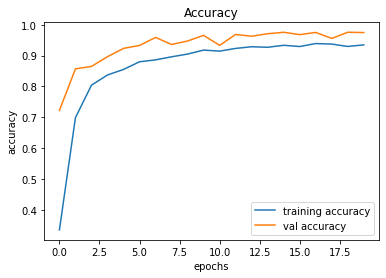

In [14]:
 ## Plot Accuracy Graph
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<ipython-input-15-6621336fb6e7>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(history.history['loss'],Label ='training loss')
<ipython-input-15-6621336fb6e7>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(history.history['val_loss'],Label ='val loss')


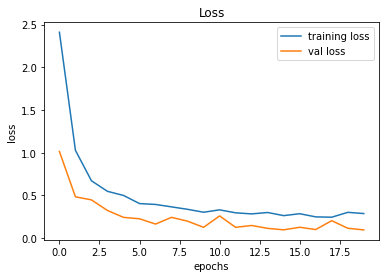

In [15]:
## Plot Loss Graph
plt.plot(history.history['loss'],Label ='training loss')
plt.plot(history.history['val_loss'],Label ='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
## Testing on Test Data

def testing(testcsv):
    y_test = pd.read_csv(testcsv)              # Read csv file
    label = y_test["ClassId"].values           # define label
    imgs = y_test["Path"].values               # define images
    data=[]                                    # create empty list named data
    for img in imgs:
        image = Image.open(img)                # open image into  
        image = image.resize((30,30))          # resize imgage into 30*30 
        data.append(np.array(image))           # append data label 
    X_test=np.array(data)                      # Converting data into array X test.
    return X_test, label                       # Return x_test and label

In [17]:
## Load Test.csv file 
X_test, label = testing('Test.csv')          # Call function of testing with Load test.csv file 


In [18]:
predict_Y=model.predict(X_test)                # Predict classes and store it in _pred
Y_pred = np.argmax(predict_Y,axis=1)
Y_pred

array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

In [19]:
## Check the Accuracy with Test Data.

from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))           # Display/ Print accuracy score

0.9350752177355502


In [10]:
## Save The Model

model.save("training/TSR.h5")           # Save model to training folder into h5 format. So, no need to create model once again.

In [5]:
## Load the Model
import os
os.chdir(r'D:\Projects\Traffic_Sign_Recognition\GTRSB')   # Change directory of Data Path
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [6]:
# Define dictionary - Classes of trafic signs

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    predict_Y=model.predict(X_test)                # Predict classes and store it in _pred
    Y_pred = np.argmax(predict_Y,axis=1)
    Y_pred
    return image, Y_pred


Predicted Traffic sign is :  Keep right


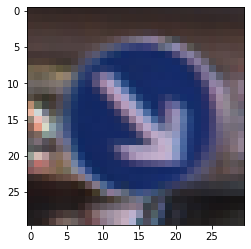

In [16]:
plot, prediction = test_on_img(r'D:\Projects\Traffic_Sign_Recognition\GTRSB\test\00002.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted Traffic sign is : ", classes[a])
plt.imshow(plot)
plt.show()
